Import Packages

In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir,'..')))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scripts.data_loader import load_data


Load Dataset

In [3]:
df = load_data('../data/raw_analyst_ratings.csv')

Headline lenghts

In [4]:
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


Articles per publisher

In [12]:
publisher_counts = df['publisher'].value_counts()
df['publisher'].value_counts()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

Publication trends

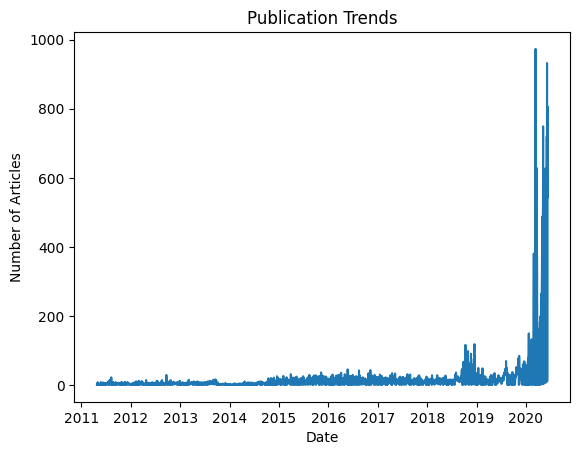

In [22]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])
publication_trends = df.groupby(df['date'].dt.date).size()
publication_trends.plot()
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Publication Trends')
plt.show()